In [1]:
# libraries to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import seaborn as sns

In [2]:
CarSeats = load_data('Carseats')
CarSeats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
CarSeats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
CarSeats.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [6]:
CarSeats['Education'].unique()
# possible categorical value

array([17, 10, 12, 14, 13, 16, 15, 18, 11])

In [14]:
formula = "Sales ~ Price + C(Urban) + C(US)"
model = smf.ols(formula, data = CarSeats)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           2.39e-23
Time:                        14:47:56   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     20.036      0.000      11.764      14.323
C(Urban)[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
C(US)[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price              -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# dropping the Urban predicor as its statistically insignificant
formula2 = "Sales ~ Price + C(US)"
model2 = smf.ols(formula2, data = CarSeats)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           2.66e-24
Time:                        15:32:31   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652      0.000      11.790      14.271
C(US)[T.Yes]     1.1996      0.258      4.641      0.000       0.692       1.708
Price           -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
anova_lm(results,results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,396.0,2420.834671,0.0,NaN,NaN,NaN
1,397.0,2420.874462,-1.0,-0.03979,0.006525,NaN


In [ ]:
"""
both have the same coefficient of determination - R square statistic.
but the second one achieves with lesser number of predictors. so we can consider 2nd is better than the 1st
"""

In [20]:
# 95% confidence interval for the coefficients
results2.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
C(US)[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


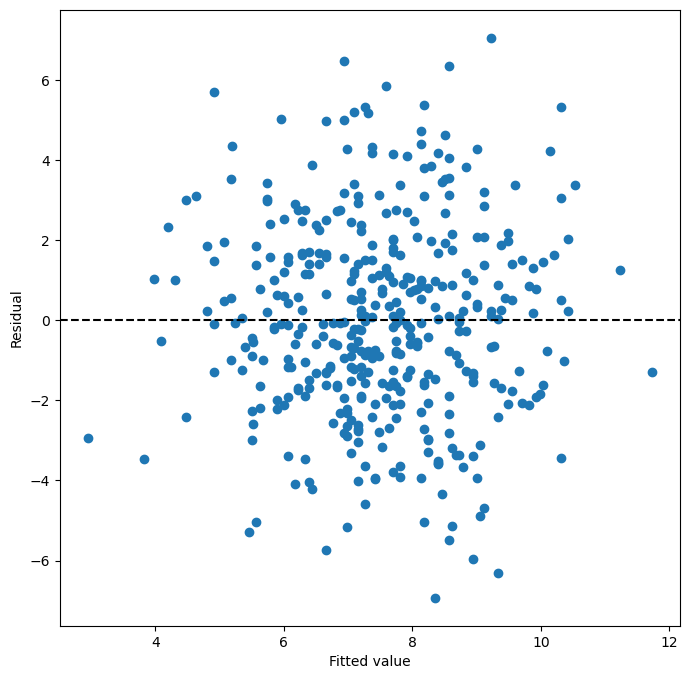

In [21]:
# residual plot
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results2.fittedvalues, results2.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [ ]:
"""
despite the lower fitment of the model , we dont see any patterns in the residual plot
indicates that the relationship is linear
"""

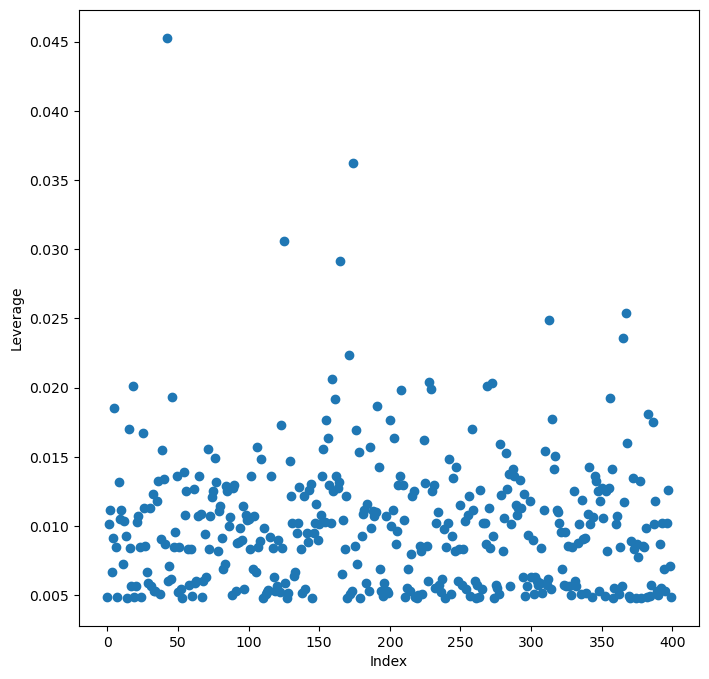

In [23]:
# Computes influence diagnostics for each observation in your fitted OLS model
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(CarSeats.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

# identifies index of largest element of an array
highest_influence_observation = np.argmax(infl.hat_matrix_diag)

In [25]:
# index of largest element of an array
highest_influence_observation = np.argmax(infl.hat_matrix_diag)
print(highest_influence_observation)

42


In [26]:
CarSeats.iloc[42]

Sales           10.43
CompPrice          77
Income             69
Advertising         0
Population         25
Price              24
ShelveLoc      Medium
Age                50
Education          18
Urban             Yes
US                 No
Name: 42, dtype: object

In [27]:
CarSeats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


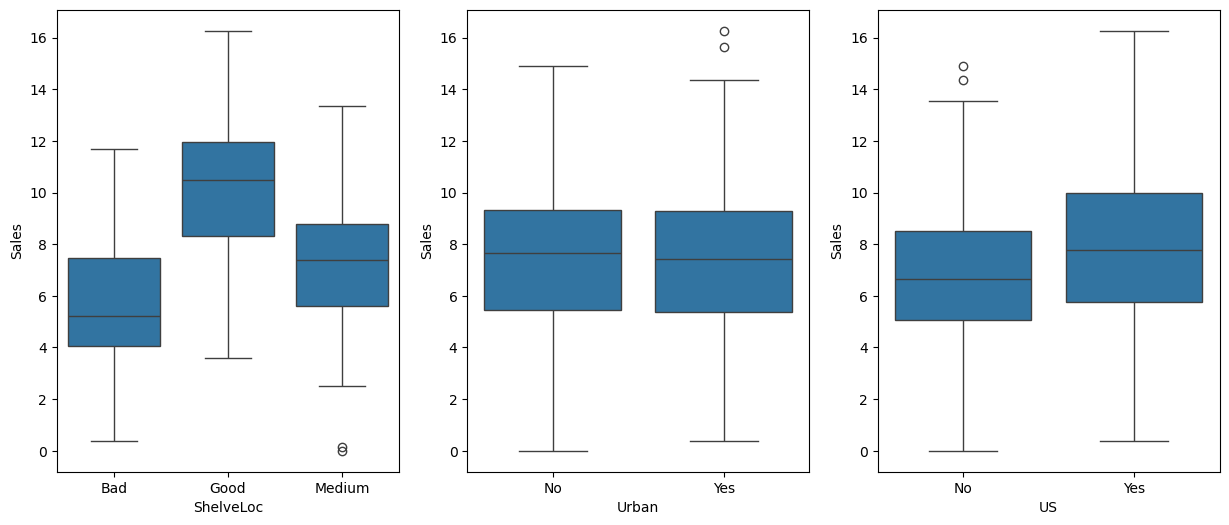

In [41]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6))
sns.boxplot(x = CarSeats['ShelveLoc'], y = CarSeats['Sales'], data = CarSeats, ax = axes[0]);
sns.boxplot(x = CarSeats['Urban'], y = CarSeats['Sales'], data = CarSeats, ax = axes[1]);
sns.boxplot(x = CarSeats['US'], y = CarSeats['Sales'], data = CarSeats, ax = axes[2]);

In [ ]:
"""
the highest inflation observation has more of the values as minimum in the overall dataset. 
the predictors being CompPrice, Ad, Price
also the categorical values Urban category and US category of the observation matches with the low number of sales
"""